# Q.1 Load required libraries

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Q.2 Load the dataset

In [4]:
df = pd.read_csv('/home/ds8/Downloads/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Q.3 Check the shape of the data

In [5]:
df.shape

(319795, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

* There are 319795 instances and 18 columns.
* There are no missing values present in the dataset.
* The columns -BMI, Physical Health, Mntal Health and Asthma are having float datatype and rest all columns have integer datatype.

# Q.4. Check the statistical summary of the dataset & write inferences

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [9]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


* we can observe that minimum BMI is 12 .
* 75 % of the population have BMI less than 31. hence max is the outlier.
* We can observe Q1 & Q3, from which IQR is 7.39.
* HeartDisease, Smoking, Alcohol Drinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, and SkinCancer columns contain the binary categories 'Yes' or 'NO'. There are 6 different race category.

# Q.5 Check the percentage of missing values in each column of the data frame.

In [10]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
# checking percentage of missing values
df.isna().sum()/df.shape[0]*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

* There is no missing data in given data set.

# Q.6 Check if there are any duplicate rows.

In [12]:
df[df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [13]:
# dropping dupicate records
df.drop_duplicates(inplace=True)

In [14]:
# checking data after dropping duplicates
df.duplicated().sum()

0

In [15]:
# checking updated shape of dataframe
df.shape

(301717, 18)

* From 319795 (original rows of dataset) no. of rows  is reduced to 301717 rows.

# Q.7 Check the distribution of the target variable (i.e. 'HeartDisease')

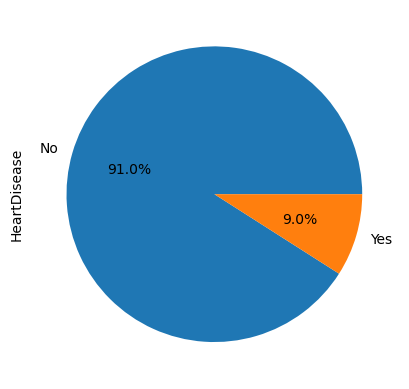

In [16]:
# showing distribution of 'HeartDisease' in Pichart
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

* we can observe that the target class has highly imbalenced ditribution.

# Q. 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [17]:
cat_features = df.select_dtypes(include=[np.object])
cat_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

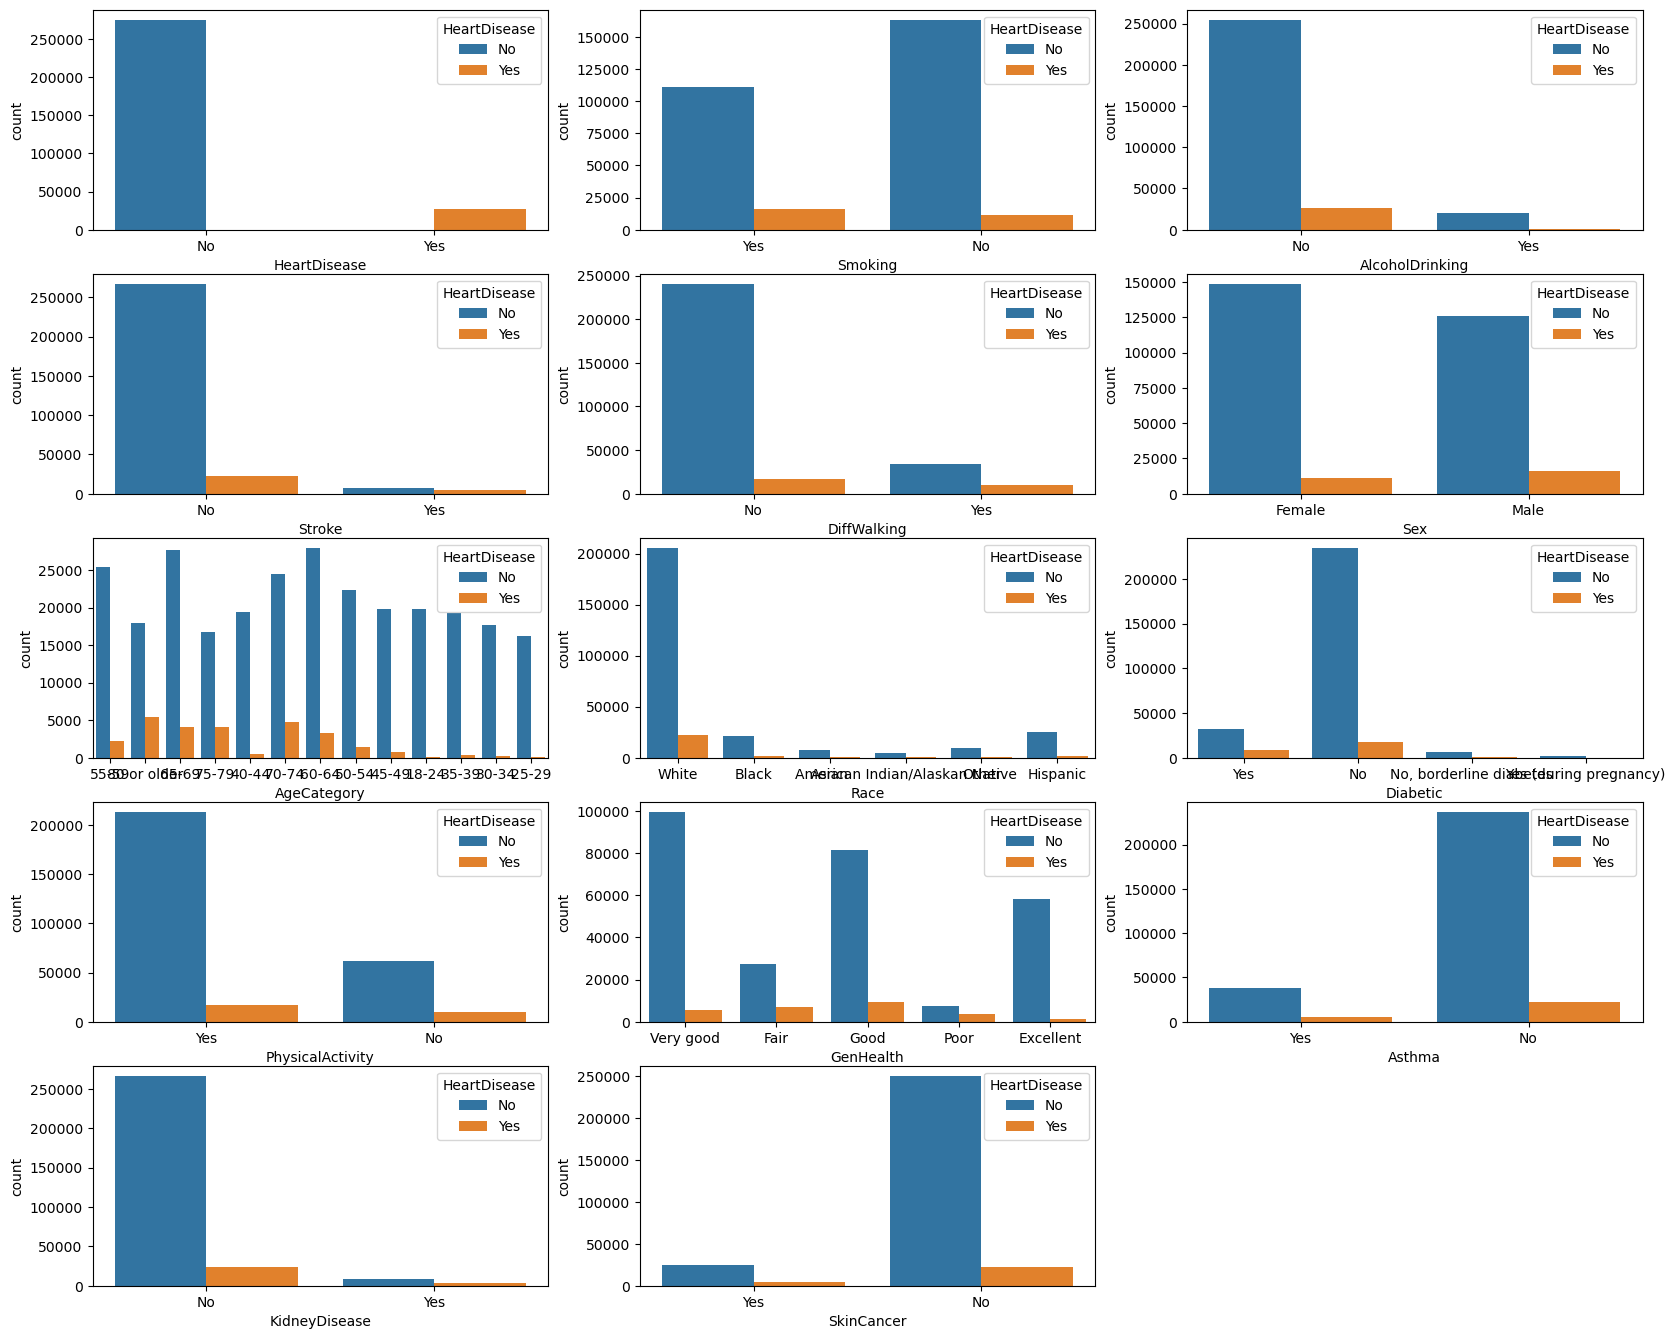

In [18]:
i = 1
plt.figure(figsize = (20,20))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = df)
    i +=1

From the plot we can observe that:
* People who smoke & have alcohol drinking have higher chances of heart diesease than non smokers.
* people having heart disease are more prone to have Stroke.
* chances of heart disease increases if patient is suffering from difficult walking.
* Males are having more chances of getting heart disease compared to females.
* people having age between 55-75 yrs are more prone for Heart disease.
* People from white race have more risk of getting heart disease than black people.
* risk of Heart Disease increase with decrease in physical activity and general health.
* people having asthma are comparatively having more chance of getting heart disese.
* people diagnosed with kidney disease have more chance of getting heart disese too.


# Q. 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [19]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [20]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [21]:
# replacing special characters
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [22]:
# checking after replacment
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
# rechecking value_counts after replacement
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

# Q. 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1.

In [24]:
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1,'No':0})

In [25]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

# Q. 11. Label Encode the columns \"AgeCategory\", \"Race\", and \"GenHealth\". Encode the rest of the columns using dummy encoding approach

In [26]:
le = LabelEncoder()

In [27]:
# label encoding multiple columns
df.iloc[:,[9,10,13]] = df.iloc[:,[9,10,13]].apply(le.fit_transform)

In [28]:
# check columns after label encoding
df.iloc[:,[9,10,13]].head(10)

,AgeCategory,Race,GenHealth
0,7,5,4
1,12,5,4
2,9,5,1
3,11,5,2
4,4,5,4
5,11,2,1
6,10,5,1
7,12,5,2
8,12,5,1
9,9,5,2


In [29]:
df = pd.get_dummies(df,drop_first=True)
## let check few samples after encoding.
df.head(10)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0
5,1,28.87,6.0,0.0,11,2,1,12.0,1,0,0,1,0,0,0,0,0,0
6,0,21.63,15.0,0.0,10,5,1,4.0,0,0,0,0,0,0,1,1,0,1
7,0,31.64,5.0,0.0,12,5,2,9.0,1,0,0,1,0,1,0,1,0,0
8,0,26.45,0.0,0.0,12,5,1,5.0,0,0,0,0,0,0,0,0,1,0
9,0,40.69,0.0,0.0,9,5,2,10.0,0,0,0,1,1,0,1,0,0,0


# Q. 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable."

In [30]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

# Q.13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data"

In [31]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30, random_state=1)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


# Q.14. Standardize the numerical columns using Standard Scalar approach for both train and test data

In [43]:
ss = StandardScaler()

X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])

In [44]:
# scaling the data using standard scalar
ss= StandardScaler()

X_train_sc = ss.fit_transform(X_train.iloc[:,:])
X_test_sc = ss.transform(X_test.iloc[:,:])

In [45]:
# checking training data
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
188627,-0.516354,-0.439337,-0.507179,1.251880,0.512361,-1.469684,-0.057969,0,0,0,0,1,0,1,0,0,1
301971,2.203127,-0.439337,0.724062,0.694199,0.512361,-0.146465,0.623187,0,0,0,1,0,0,1,0,0,0


In [46]:
# checking test data
X_test.head(4)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
249747,0.081963,-0.439337,-0.507179,-0.142323,-1.920700,-0.146465,-0.739125,0,0,0,0,0,0,1,1,0,0
196201,2.503059,-0.193735,1.955304,0.136518,0.512361,-0.146465,0.623187,0,0,0,0,0,0,1,0,0,0
228204,-0.836384,0.788676,-0.507179,0.973039,0.512361,-0.808075,2.666656,1,0,0,1,1,1,0,0,1,1
65497,-0.085009,-0.439337,-0.507179,-1.257685,0.512361,1.176754,-0.057969,0,0,0,0,0,0,1,0,0,0


# Q. 15. Write a function
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score."

In [40]:
# Fit logistic regression model for the unscaled train dataset
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [48]:
# fit logistic Regression model for scaled train dataset
log_reg1 = LogisticRegression()
log_reg1.fit(X_train_sc,Y_train)

LogisticRegression()

In [49]:
# compute y predicted labels for both scaled & unscaled data
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

y_pred_train_sc = log_reg1.predict(X_train_sc)
y_pred_test_sc = log_reg1.predict(X_test_sc)


In [50]:
# accuracy for unscaled data
print('Accuracy train:',accuracy_score(Y_train,y_pred_train))
print('Accuracy test:',accuracy_score(Y_test,y_pred_test))

Accuracy train: 0.9104691739148962
Accuracy test: 0.9098612400017676


# Q.16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [52]:
# using above logistic Regression
# compute precision, recall and F1-score 
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     82369
           1       0.50      0.09      0.15      8147

    accuracy                           0.91     90516
   macro avg       0.71      0.54      0.55     90516
weighted avg       0.88      0.91      0.88     90516



In [53]:
# Fit naive bayes classifier for the train dataset
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_sc,Y_train)

GaussianNB()

In [54]:
# compute the y predicted labels
nb_y_pred_train = gnb.predict(X_train_sc)
nb_y_pred_test = gnb.predict(X_test_sc)

In [55]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,nb_y_pred_train))
print('Accuracy test:',accuracy_score(Y_test,nb_y_pred_test))

Accuracy train: 0.8419467710853642
Accuracy test: 0.8400172345220734


In [56]:
# compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,nb_y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     82369
           1       0.27      0.45      0.34      8147

    accuracy                           0.84     90516
   macro avg       0.60      0.66      0.62     90516
weighted avg       0.88      0.84      0.86     90516



In [57]:
# Fit the KNN classifier model to the train dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sc,Y_train)

KNeighborsClassifier()

In [61]:
# compute y predicted labels
y_pred_train_knn = knn.predict(X_train_sc)
y_pred_test_knn = knn.predict(X_test_sc)

In [64]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_pred_train_knn))
print('Accuracy test:',accuracy_score(Y_test,y_pred_test_knn))

Accuracy train: 0.9207816250870025
Accuracy test: 0.8982721286844315


In [60]:
# compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     82369
           1       0.33      0.13      0.19      8147

    accuracy                           0.90     90516
   macro avg       0.63      0.55      0.57     90516
weighted avg       0.87      0.90      0.88     90516



In [65]:
# Fit the decision tree classifeir model to the train dataset
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,Y_train)

# compute y predicted labels
y_test_pred_dt = dt.predict(X_test_sc)
y_train_pred_dt = dt.predict(X_train_sc)

In [66]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_train_pred_dt))
print('Accuracy test:',accuracy_score(Y_test,y_test_pred_dt))

Accuracy train: 0.9973674367072125
Accuracy test: 0.8541804763798665


In [67]:
# Fit the Random Forest Classifier model to the train dataset
rf = RandomForestClassifier()
rf.fit(X_train_sc,Y_train)

# compute y predicted labels
y_test_pred_rf = rf.predict(X_test_sc)
y_train_pred_rf = rf.predict(X_train_sc)

In [69]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_train_pred_rf))
print('Accuracy test:',accuracy_score(Y_test,y_test_pred_rf))

Accuracy train: 0.9972869446640877
Accuracy test: 0.8984488930133899


In [82]:
# Fit the Random Forest Classifier model to the train dataset
rf1 = RandomForestClassifier( n_estimators=300, criterion='gini', max_depth=20,
                            min_samples_split=4, min_samples_leaf=2, max_samples=None)
rf1.fit(X_train_sc,Y_train)

# compute y predicted labels
y_test_pred_rf1 = rf1.predict(X_test_sc)
y_train_pred_rf1 = rf1.predict(X_train_sc)

In [84]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_train_pred_rf1))
print('Accuracy test:',accuracy_score(Y_test,y_test_pred_rf1))

Accuracy train: 0.9368421551034323
Accuracy test: 0.9102921030536038


In [85]:
# compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_rf1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     82369
           1       0.51      0.07      0.13      8147

    accuracy                           0.91     90516
   macro avg       0.71      0.53      0.54     90516
weighted avg       0.88      0.91      0.88     90516



In [70]:
# compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     82369
           1       0.32      0.12      0.17      8147

    accuracy                           0.90     90516
   macro avg       0.62      0.55      0.56     90516
weighted avg       0.86      0.90      0.88     90516



In [71]:
# Fit the Adaboost Classifier model to the train dataset
adb = AdaBoostClassifier()
adb.fit(X_train_sc,Y_train)

# compute y predicted labels
y_test_pred_adb = adb.predict(X_test_sc)
y_train_pred_adb = adb.predict(X_train_sc)

In [72]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_train_pred_adb))
print('Accuracy test:',accuracy_score(Y_test,y_test_pred_adb))

Accuracy train: 0.9111083754338284
Accuracy test: 0.9108334438110389


In [74]:
# compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_adb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     82369
           1       0.52      0.11      0.18      8147

    accuracy                           0.91     90516
   macro avg       0.72      0.55      0.57     90516
weighted avg       0.88      0.91      0.88     90516



In [75]:
# Fit the GradientBoost Classifier model to the train dataset
gb = GradientBoostingClassifier()
gb.fit(X_train_sc,Y_train)

# compute y predicted labels
y_test_pred_gb = gb.predict(X_test_sc)
y_train_pred_gb = gb.predict(X_train_sc)

In [76]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_train_pred_gb))
print('Accuracy test:',accuracy_score(Y_test,y_test_pred_gb))

Accuracy train: 0.9120790147773922
Accuracy test: 0.9111980202395157


In [78]:
# Fit the  Stacking Classifier model to the train dataset
models = [('lr',LogisticRegression()),('dt',DecisionTreeClassifier(max_depth=7),AdaBoostClassifier())]
sc = StackingClassifier(estimators=models, final_estimator = RandomForestClassifier(n_estimators=300,criterion='gini', max_depth=20,
                            min_samples_split=4, min_samples_leaf=2, max_samples=None))
sc.fit(X_train_sc,Y_train)

# compute y predicted labels
y_test_pred_sc = sc.predict(X_test_sc)
y_train_pred_sc = sc.predict(X_train_sc)

In [79]:
# accuracy
print('Accuracy train:',accuracy_score(Y_train,y_train_pred_sc))
print('Accuracy test:',accuracy_score(Y_test,y_test_pred_sc))

Accuracy train: 0.9090581957471793
Accuracy test: 0.9072318706085112


In [80]:
# compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_sc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     82369
           1       0.43      0.09      0.15      8147

    accuracy                           0.91     90516
   macro avg       0.67      0.54      0.55     90516
weighted avg       0.87      0.91      0.88     90516



In [81]:
Comparison1 = pd.DataFrame({'Method':['Logistic Regression'],
                            'Train accuracy': accuracy_score(Y_train,y_pred_train),
                            'Test accuracy': accuracy_score(Y_test,y_pred_test)})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Classifier'],
                            'Train accuracy': accuracy_score(Y_train,nb_y_pred_train),
                            'Test accuracy': accuracy_score(Y_test,nb_y_pred_test)})
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'],
                            'Train accuracy': accuracy_score(Y_train,y_pred_train_knn),
                            'Test accuracy': accuracy_score(Y_test,y_pred_test_knn)})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


Comparison4 = pd.DataFrame({'Method':['Decision Tree Classifier'],
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_dt),
                            'Test accuracy': accuracy_score(Y_test,y_test_pred_dt)})
Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Random Forest Classifier'],
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_rf),
                            'Test accuracy': accuracy_score(Y_test,y_test_pred_rf)})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]


Comparison6 = pd.DataFrame({'Method':['AdaBoost Classifier'],
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_adb),
                            'Test accuracy': accuracy_score(Y_test,y_test_pred_adb)})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]


Comparison7 = pd.DataFrame({'Method':['GradientBoost Classifier'],
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_gb),
                            'Test accuracy': accuracy_score(Y_test,y_test_pred_gb)})
Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]


Comparison8 = pd.DataFrame({'Method':['Stacking Classifier'],
                            'Train accuracy': accuracy_score(Y_train,y_train_pred_sc),
                            'Test accuracy': accuracy_score(Y_test,y_test_pred_sc)})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]


Comparison = pd.concat([Comparison1,Comparison2,Comparison3,Comparison4,Comparison5,Comparison6,Comparison7,Comparison8])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,0.910469,0.909861
0,Naive Bayes Classifier,0.841947,0.840017
0,KNN,0.920782,0.898272
0,Decision Tree Classifier,0.997367,0.854180
0,Random Forest Classifier,0.997287,0.898449
0,AdaBoost Classifier,0.911108,0.910833
0,GradientBoost Classifier,0.912079,0.911198
0,Stacking Classifier,0.909058,0.907232


* We see that the best performing models are Gradient Boost Classifier, Adaboost Classifier with around 91% Test accuracy.
*  the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
* By using different sets of hyper-parameters the model accuracy for train & test is somewhat balenced, as shown in Random Forest Classifier.
* we can try and tune different combinations of the hyperparameters and increse the accuracy of the model.
* We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.


# HAPPY LEARNING :)